## Project Overview
This notebook presents an Exploratory Data Analysis (EDA) on the Major Crime Indicators (MCI) dataset provided by the Toronto Police Service. The dataset covers crime incidents reported from 2014 to 2024 and focuses on geospatial trends to gain insights into crime-prone areas in Toronto.

## Objectives
Clean and preprocess the raw MCI dataset

Analyze crimes by location type and neighbourhood

Visualize patterns of assault, auto theft, break and enter, robbery, and theft over

Identify key insights to support public safety efforts

## Dataset Details
Source: Toronto Police Service Open Data Portal

Format: CSV

Rows: ~384K

Columns: 31 (reduced to 14 after cleaning)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/major-crime-indicators/major-crime-indicators.csv


In [2]:
df = pd.read_csv("/kaggle/input/major-crime-indicators/major-crime-indicators.csv")

In [3]:
df.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,1,GO-20141260715,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3.0,...,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92)
1,2,GO-20141260079,2014-01-01,2013-12-31,2014,January,1,1,Wednesday,1.0,...,Other Commercial / Corporate Places (For Profi...,Commercial,2120,200,B&E,Break and Enter,070,South Riverdale (70),070,South Riverdale (70)
2,3,GO-20141260912,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,6.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1610,100,Robbery With Weapon,Robbery,078,Kensington-Chinatown (78),078,Kensington-Chinatown (78)
3,4,GO-20141260322,2014-01-01,2013-12-31,2014,January,1,1,Wednesday,7.0,...,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,200,B&E,Break and Enter,158,Islington (158),014,Islington-City Centre West (14)
4,5,GO-20141260521,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,2.0,...,Bar / Restaurant,Commercial,2120,200,B&E,Break and Enter,081,Trinity-Bellwoods (81),081,Trinity-Bellwoods (81)


In [4]:
df.shape

(396735, 27)

In [5]:
df.dtypes

_id                    int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR          float64
OCC_YEAR             float64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR             float64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
dtype: object

## Data Cleaning Summary
Removed null entries from key datetime columns

Dropped 17 irrelevant or redundant columns

Converted datetime fields to datetime64[ns, UTC] format

Final cleaned shape: 384566 rows × 14 columns

In [6]:
(df.isnull().sum()/len(df)) * 100

_id                  0.000000
EVENT_UNIQUE_ID      0.000000
REPORT_DATE          0.000000
OCC_DATE             0.000000
REPORT_YEAR          0.000000
REPORT_MONTH         0.000000
REPORT_DAY           0.000000
REPORT_DOY           0.000000
REPORT_DOW           0.000000
REPORT_HOUR          3.337996
OCC_YEAR             0.032767
OCC_MONTH            0.032767
OCC_DAY              0.032767
OCC_DOY              0.032767
OCC_DOW              0.032767
OCC_HOUR             6.982243
DIVISION             0.000000
LOCATION_TYPE        0.000000
PREMISES_TYPE        0.000000
UCR_CODE             0.000000
UCR_EXT              0.000000
OFFENCE              0.000000
MCI_CATEGORY         0.000000
HOOD_158             0.000000
NEIGHBOURHOOD_158    0.000000
HOOD_140             0.000000
NEIGHBOURHOOD_140    0.000000
dtype: float64

In [7]:
df = df.dropna()

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.drop(['REPORT_DAY','REPORT_DOY','REPORT_DOW','REPORT_HOUR',
              'OCC_DAY','OCC_DOY','OCC_DOW','OCC_HOUR',
              'HOOD_140','NEIGHBOURHOOD_140', 'UCR_CODE', 'UCR_EXT'], axis = 1)
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'])
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

In [10]:
df.shape

(364106, 15)

In [11]:
df.dtypes

_id                           int64
EVENT_UNIQUE_ID              object
REPORT_DATE          datetime64[ns]
OCC_DATE             datetime64[ns]
REPORT_YEAR                   int64
REPORT_MONTH                 object
OCC_YEAR                    float64
OCC_MONTH                    object
DIVISION                     object
LOCATION_TYPE                object
PREMISES_TYPE                object
OFFENCE                      object
MCI_CATEGORY                 object
HOOD_158                     object
NEIGHBOURHOOD_158            object
dtype: object

## Visualizations Used
Bar charts: Top 10 location types and top 15 neighbourhoods with highest crime counts

Heatmaps: Crime category distribution across location types and neighbourhoods

Line graphs: Year-wise trends in school assaults and in specific neighbourhoods

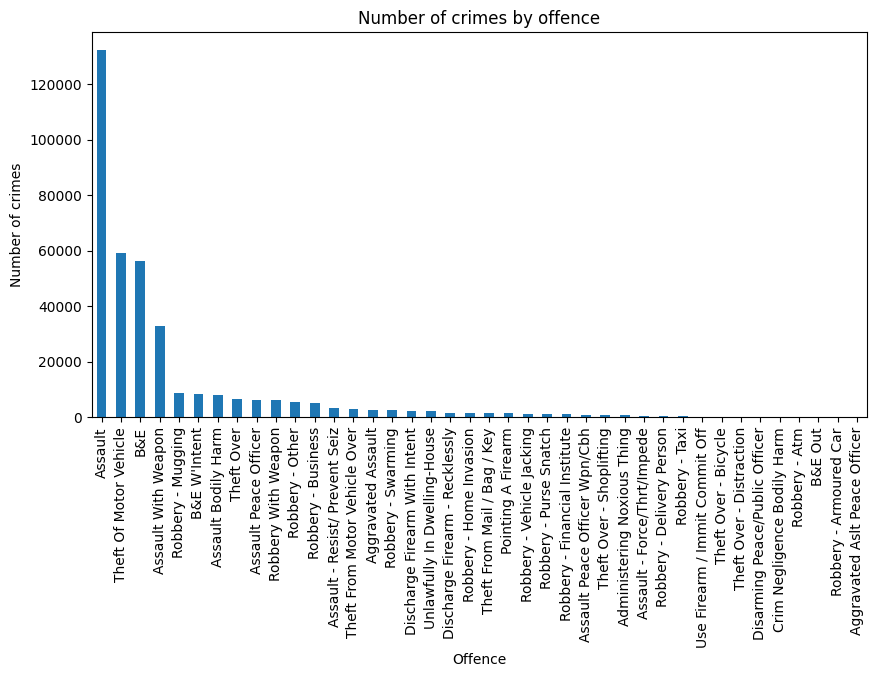

In [12]:
df.OFFENCE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of crimes by offence")
plt.ylabel('Number of crimes')
plt.xlabel('Offence');

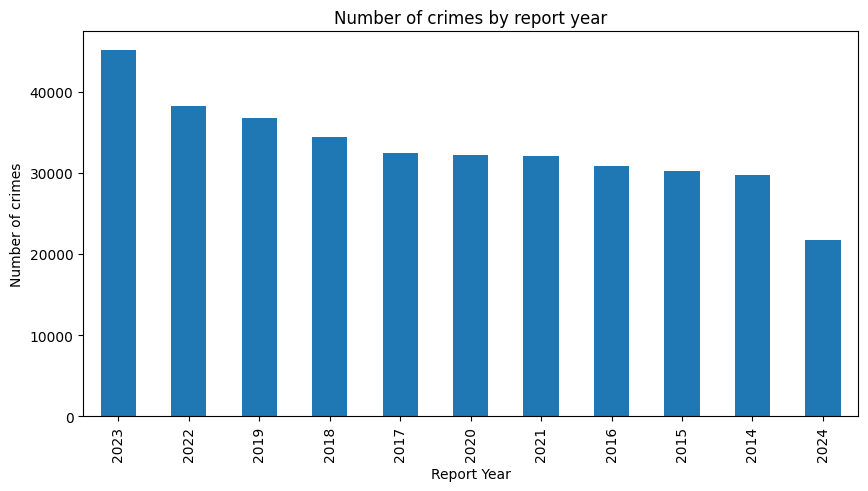

In [13]:
df.REPORT_YEAR.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of crimes by report year")
plt.ylabel('Number of crimes')
plt.xlabel('Report Year');

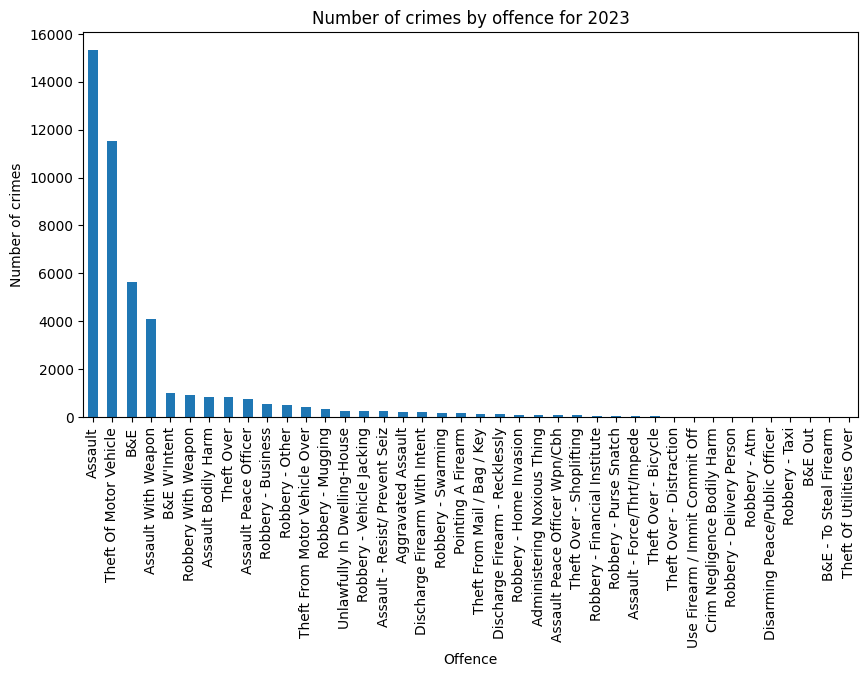

In [14]:
df_2023 = df[df['REPORT_YEAR'] == 2023]
df_2023.OFFENCE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of crimes by offence for 2023")
plt.ylabel('Number of crimes')
plt.xlabel('Offence');

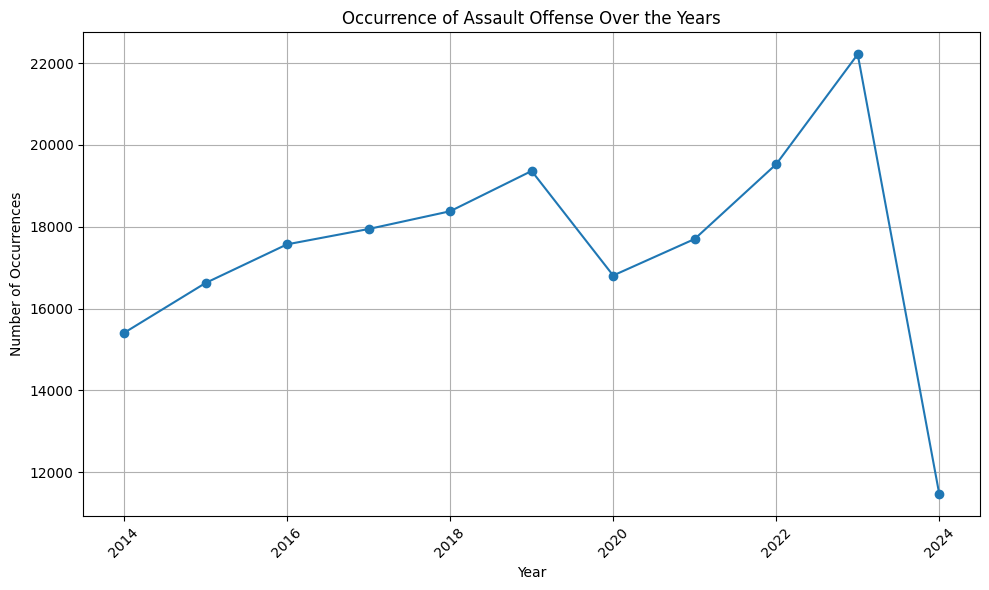

In [15]:
df_assault = df[df['MCI_CATEGORY'] == 'Assault']
assault_count = df_assault.groupby('REPORT_YEAR').size().reset_index(name='count')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(assault_count['REPORT_YEAR'], assault_count['count'], marker='o')

plt.title('Occurrence of Assault Offense Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

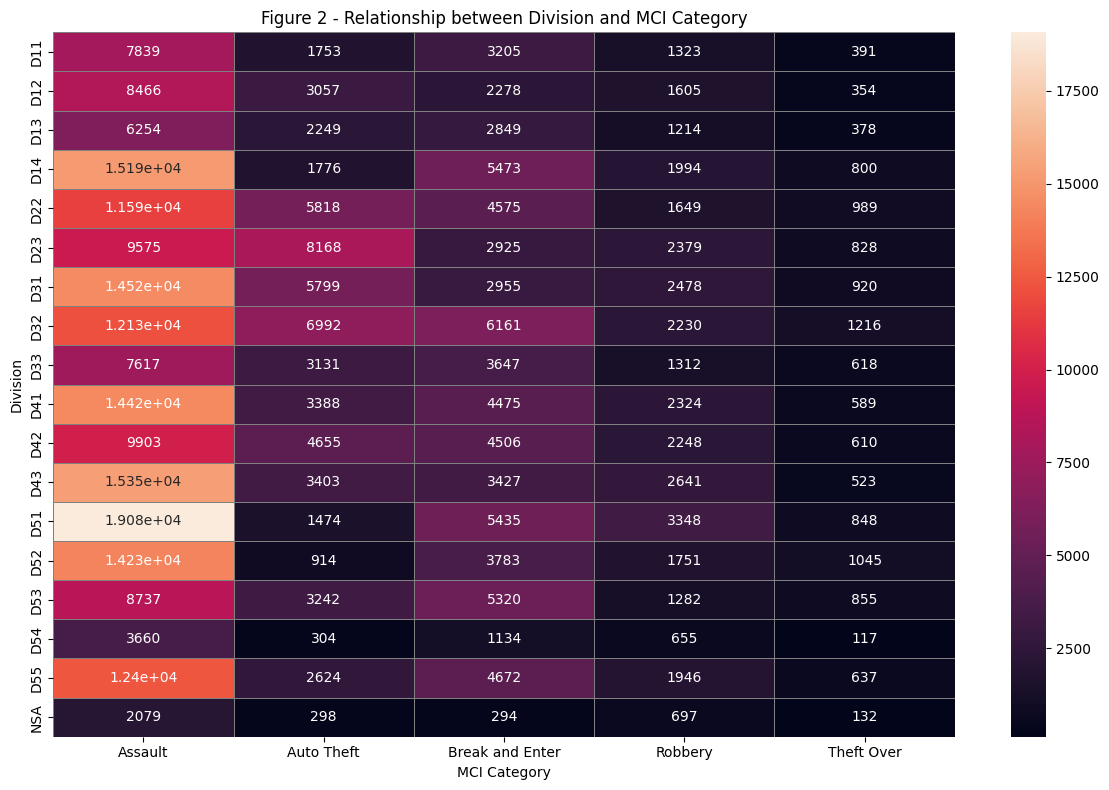

In [16]:
filtered_data = df[['DIVISION', 'MCI_CATEGORY']]

# Group data by neighborhood and offense type, and count occurrences
grouped_data = filtered_data.groupby(['DIVISION', 'MCI_CATEGORY']).size().reset_index(name='count')

# Pivot the data to have neighborhood IDs as rows, offense types as columns, and count of occurrences as values
pivot_data = grouped_data.pivot(index='DIVISION', columns='MCI_CATEGORY', values='count').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot = True, fmt = '.4g', linewidths=0.5, linecolor='gray')
plt.title('Figure 2 - Relationship between Division and MCI Category')
plt.xlabel('MCI Category')
plt.ylabel('Division')
plt.tight_layout()
plt.show()

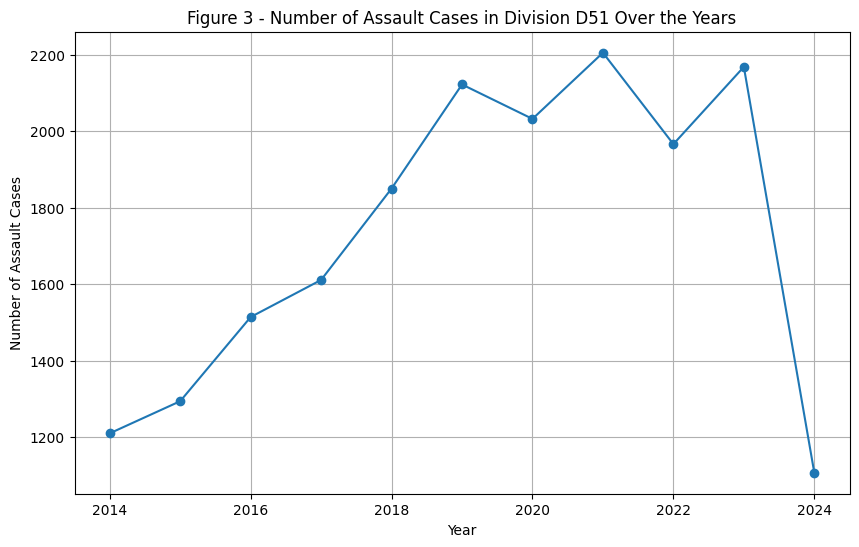

In [17]:
assault_data = df[(df['MCI_CATEGORY'] == 'Assault') & (df['DIVISION'] == 'D51')]
assault_counts = assault_data.groupby('REPORT_YEAR').size()
plt.figure(figsize=(10, 6))
plt.plot(assault_counts.index, assault_counts.values, marker='o')
plt.title('Figure 3 - Number of Assault Cases in Division D51 Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Assault Cases')
plt.grid(True)
plt.show()

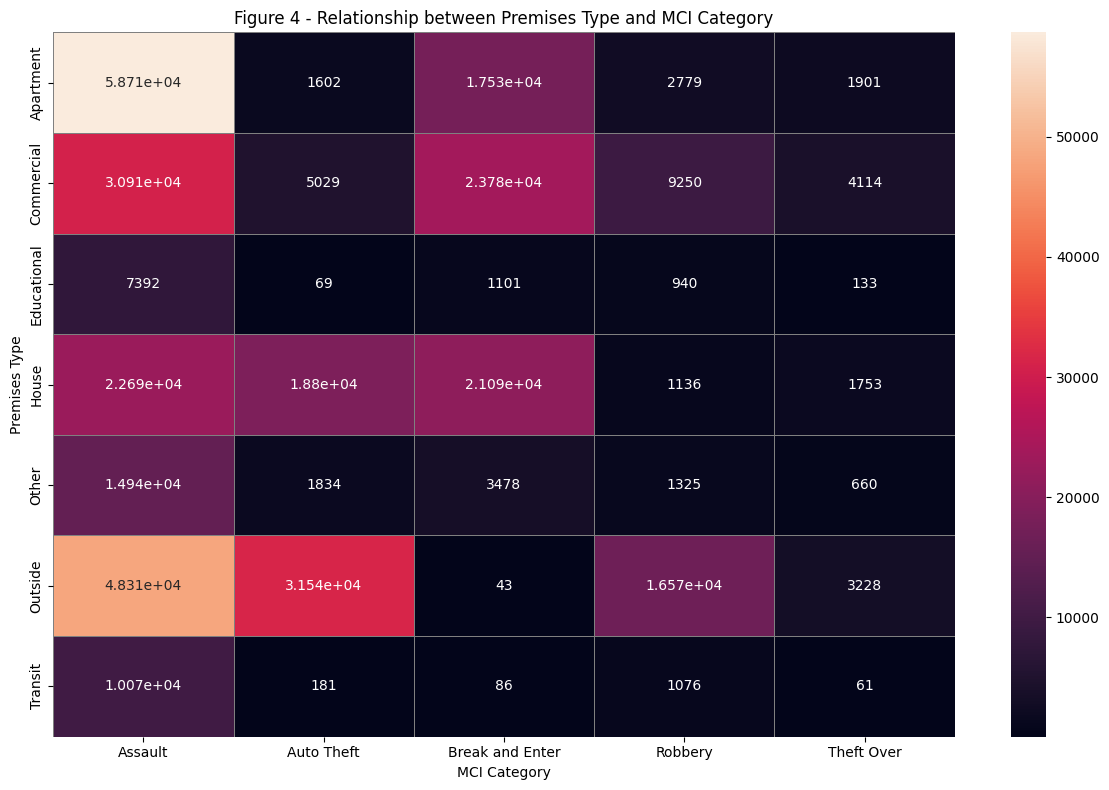

In [18]:
def format_annotation(value):
    if value >= 1000:
        return f'{value/1000:.1f}k'
    else:
        return f'{value}'

filtered_data = df[['PREMISES_TYPE', 'MCI_CATEGORY']]

# Group data by neighborhood and offense type, and count occurrences
grouped_data = filtered_data.groupby(['PREMISES_TYPE', 'MCI_CATEGORY']).size().reset_index(name='count')

# Pivot the data to have neighborhood IDs as rows, offense types as columns, and count of occurrences as values
pivot_data = grouped_data.pivot(index='PREMISES_TYPE', columns='MCI_CATEGORY', values='count').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot = True, fmt = '.4g', linewidths=0.5, linecolor='gray')
plt.title('Figure 4 - Relationship between Premises Type and MCI Category')
plt.xlabel('MCI Category')
plt.ylabel('Premises Type')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Premises Type')

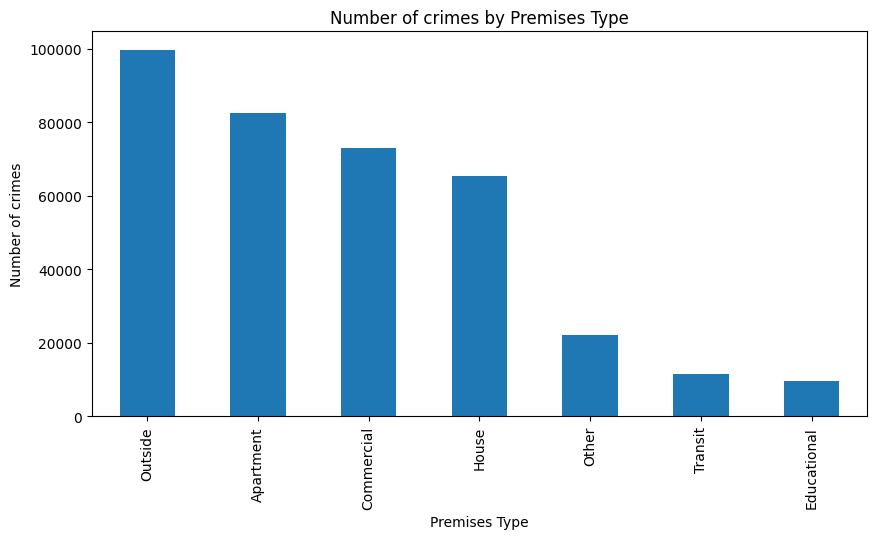

In [19]:
df.PREMISES_TYPE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of crimes by Premises Type")
plt.ylabel('Number of crimes')
plt.xlabel('Premises Type')

Text(0.5, 0, 'Division')

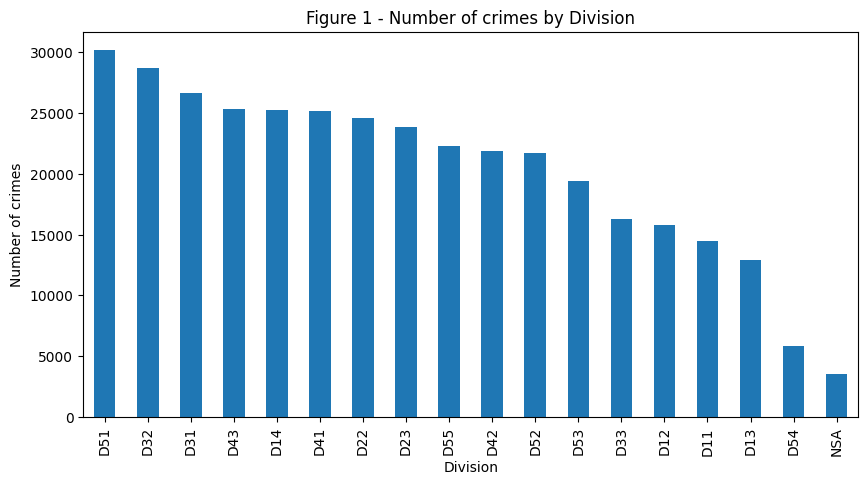

In [20]:
df.DIVISION.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Figure 1 - Number of crimes by Division")
plt.ylabel('Number of crimes')
plt.xlabel('Division')

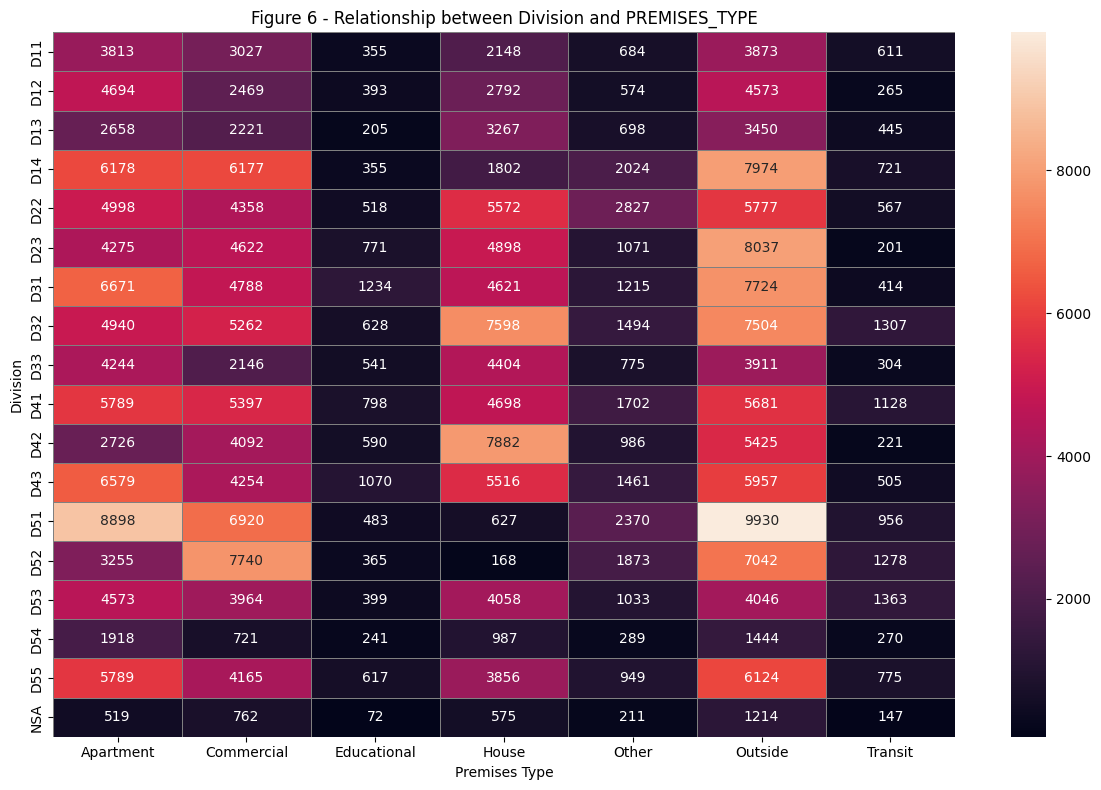

In [21]:
filtered_data = df[['DIVISION', 'PREMISES_TYPE']]

# Group data by neighborhood and offense type, and count occurrences
grouped_data = filtered_data.groupby(['DIVISION', 'PREMISES_TYPE']).size().reset_index(name='count')

# Pivot the data to have neighborhood IDs as rows, offense types as columns, and count of occurrences as values
pivot_data = grouped_data.pivot(index='DIVISION', columns='PREMISES_TYPE', values='count').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot = True, fmt = '.4g', linewidths=0.5, linecolor='gray')
plt.title('Figure 6 - Relationship between Division and PREMISES_TYPE')
plt.xlabel('Premises Type')
plt.ylabel('Division')
plt.tight_layout()
plt.show()

In [22]:
df['NEIGHBOURHOOD_158'].nunique()

159

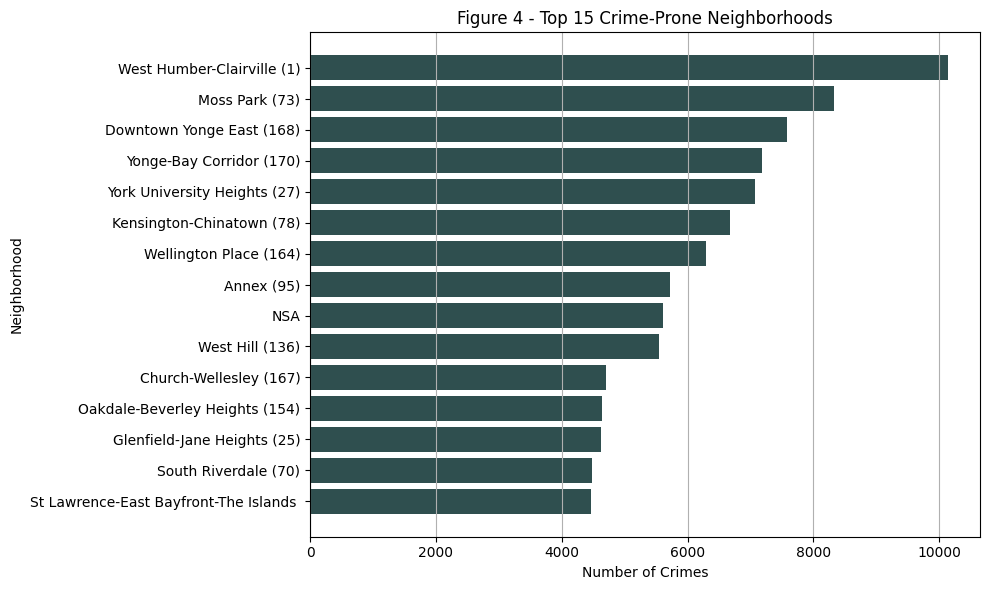

In [23]:
# Group by neighborhood ID and count the number of crimes
neighborhood_crime_counts = df.groupby('NEIGHBOURHOOD_158').size().reset_index(name='crime_count')
# Sort the neighborhoods by crime count in descending order
top_10_neighborhoods = neighborhood_crime_counts.sort_values(by='crime_count', ascending=False).head(15)
plt.figure(figsize=(10, 6))
plt.barh(top_10_neighborhoods['NEIGHBOURHOOD_158'], top_10_neighborhoods['crime_count'], color='darkslategrey')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')
plt.title('Figure 4 - Top 15 Crime-Prone Neighborhoods')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest crime count at the top
plt.grid(axis='x')  # Add grid lines only on the x-axis
plt.tight_layout()
plt.show()

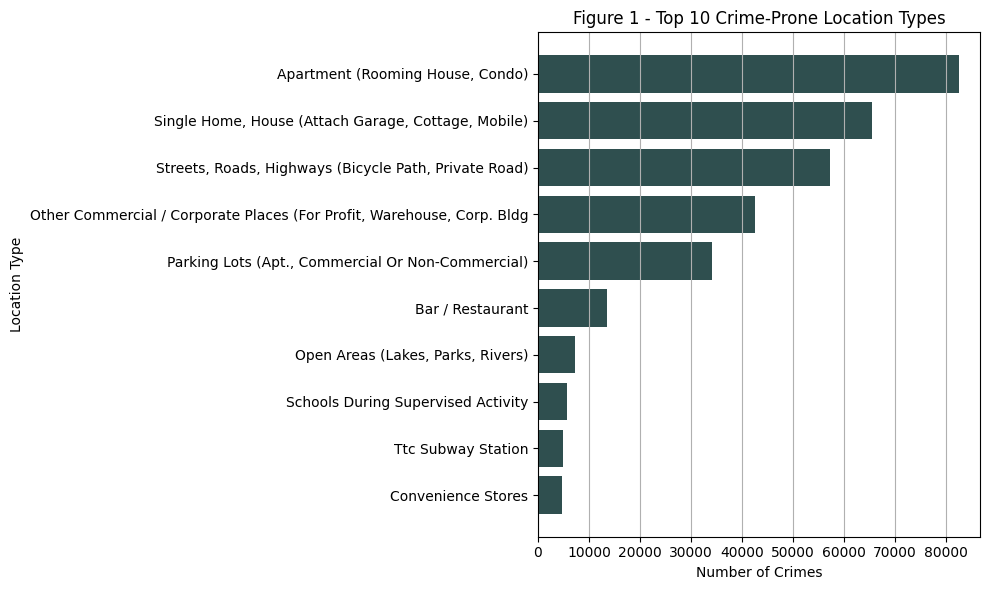

In [24]:
# Group by neighborhood ID and count the number of crimes
location_crime_counts = df.groupby('LOCATION_TYPE').size().reset_index(name='crime_count')
# Sort the neighborhoods by crime count in descending order
top_10_locations = location_crime_counts.sort_values(by='crime_count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_locations['LOCATION_TYPE'], top_10_locations['crime_count'], color='darkslategrey')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Type')
plt.title('Figure 1 - Top 10 Crime-Prone Location Types')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest crime count at the top
plt.grid(axis='x')  # Add grid lines only on the x-axis
plt.tight_layout()
plt.show()

In [25]:
print(df['LOCATION_TYPE'].nunique())

54


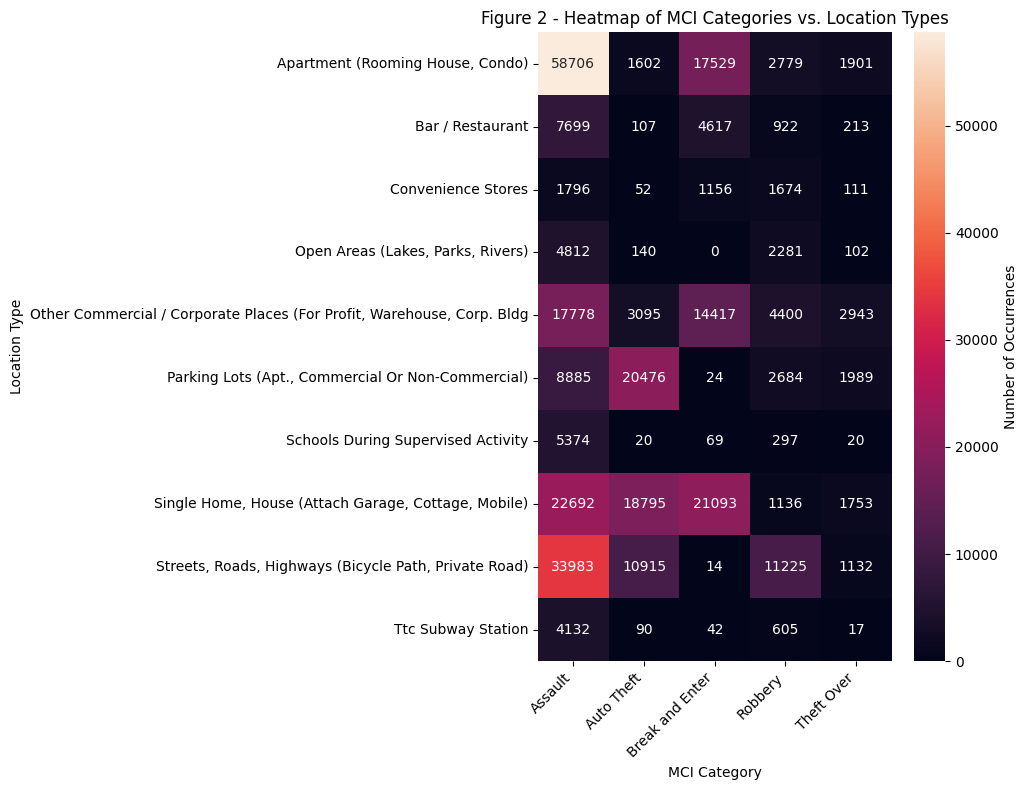

In [26]:
top_location_types = df['LOCATION_TYPE'].value_counts().head(10).index.tolist()
filtered_df = df[df['LOCATION_TYPE'].isin(top_location_types)]

# Create a pivot table to count the occurrences of each offense type within each location type
pivot_table = filtered_df.pivot_table(index='LOCATION_TYPE', columns='MCI_CATEGORY', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cbar_kws={'label': 'Number of Occurrences'})
plt.title('Figure 2 - Heatmap of MCI Categories vs. Location Types')
plt.xlabel('MCI Category')
plt.ylabel('Location Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

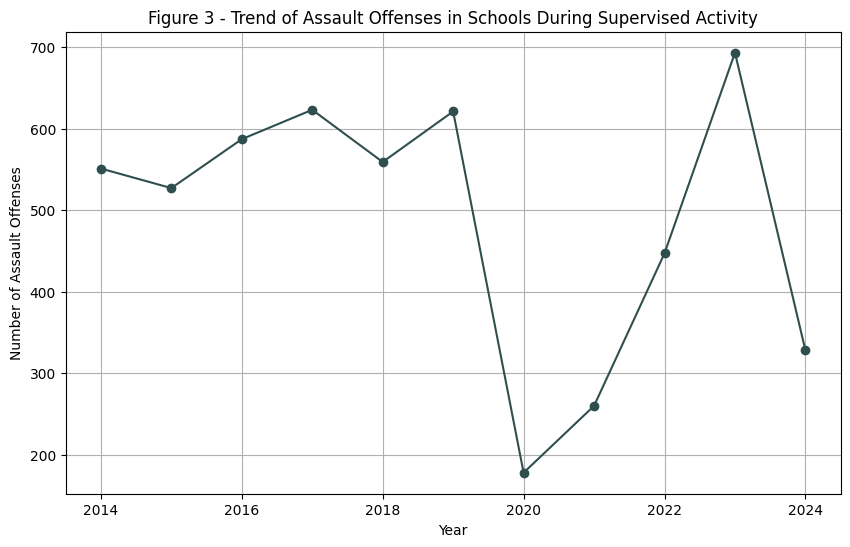

In [27]:
# Filter the data to include only rows where location type is "school" and offense type is "assault"
filtered_df = df[(df['LOCATION_TYPE'] == 'Schools During Supervised Activity') & (df['MCI_CATEGORY'] == 'Assault')]

# Group the filtered data by report year and count the number of occurrences for each year
assault_counts = filtered_df.groupby('REPORT_YEAR').size()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(assault_counts.index, assault_counts.values, marker='o', color = 'darkslategrey')
plt.title('Figure 3 - Trend of Assault Offenses in Schools During Supervised Activity')
plt.xlabel('Year')
plt.ylabel('Number of Assault Offenses')
plt.grid(True)
plt.show()

In [28]:
filtered_df = df[(df['MCI_CATEGORY'] == 'Assault') | (df['MCI_CATEGORY'] == 'Break and Enter')]

same_event_occurrences = filtered_df[filtered_df.duplicated(subset=['EVENT_UNIQUE_ID'], keep=False)]
same_event_occurrences['EVENT_UNIQUE_ID'].nunique()

23714

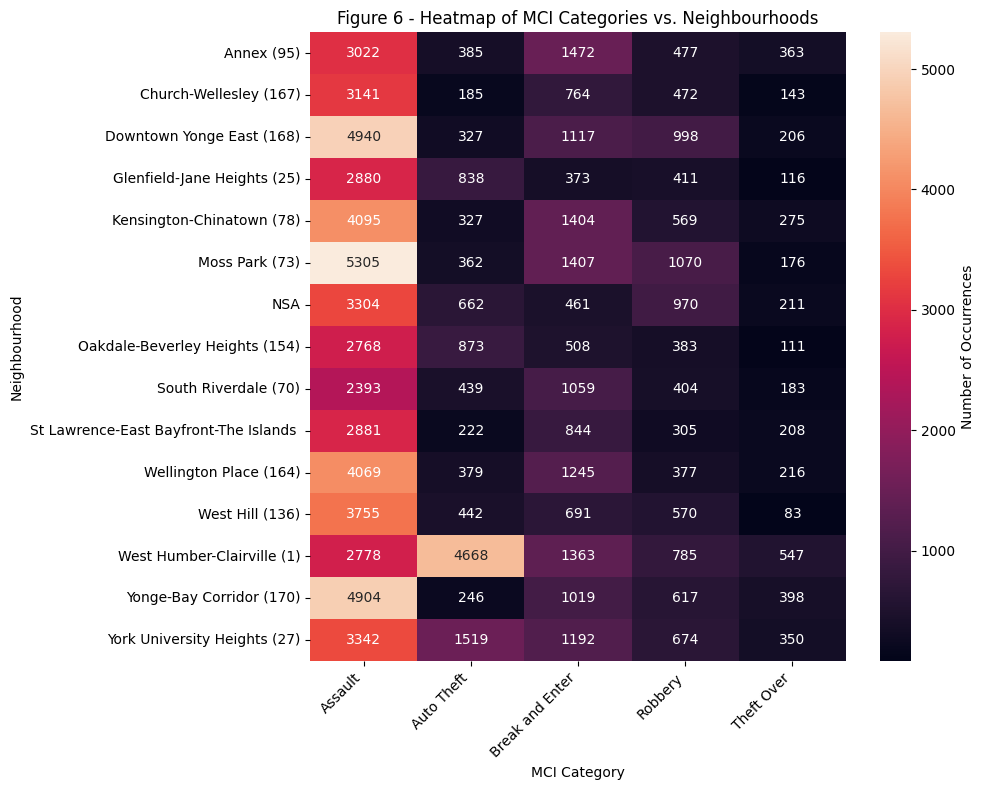

In [29]:
top_location_types = df['NEIGHBOURHOOD_158'].value_counts().head(15).index.tolist()
filtered_df = df[df['NEIGHBOURHOOD_158'].isin(top_location_types)]

# Create a pivot table to count the occurrences of each offense type within each location type
pivot_table = filtered_df.pivot_table(index='NEIGHBOURHOOD_158', columns='MCI_CATEGORY', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cbar_kws={'label': 'Number of Occurrences'})
plt.title('Figure 6 - Heatmap of MCI Categories vs. Neighbourhoods')
plt.xlabel('MCI Category')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Key Findings
Residential areas (apartments, houses) show the highest rates of assault and break-ins

Schools during supervised activity surprisingly rank high in assault cases

West Humber-Clairville is the top crime-prone neighbourhood, with Auto Theft being most frequent

Post-COVID years show a steep rise in overall crime